# CONVOLUTION LAYER

## import libraries

In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F

## import and normalize image

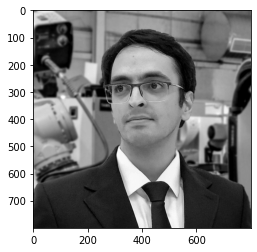

In [4]:
im_path = "1710797239367.jpeg"

bgr = cv2.imread(im_path)

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# normalize => [0,1]
gray = gray.astype("float32") / 255

plt.imshow(gray, cmap="gray")

## define and visualize filters

Filter shape:  (4, 4)


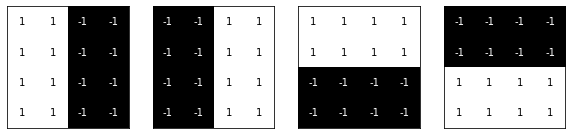

In [10]:
filter = np.array([[1, 1, -1, -1],
                   [1, 1, -1, -1],
                   [1, 1, -1, -1],
                   [1, 1, -1, -1]])
print("Filter shape: ", filter.shape)

filters = np.array([filter, -filter, filter.T, -filter.T])

fig = plt.figure(figsize = (10,5))

for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks = [], yticks =[])
    ax.imshow(filters[i], cmap = "gray")
    w, h = filters[i].shape
    for x in range(w):
        for y in range(h):
            ax.annotate(str(filters[i][x][y]), xy = (y, x), horizontalalignment = "center", verticalalignment = "center", color = "white" if filters[i][x][y] < 0 else "black")

    

## define convolution layer

In [11]:
class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()

        k_height, k_width = weight.shape[2:]

        self.conv = nn.Conv2d(1, 4, kernel_size= (k_height, k_width), bias = False)
        self.conv.weight = torch.nn.Parameter(weight)
        self.relu = F.relu
    def forward(self ,x):
        conv_x = self.conv(x)
        activated_x = self.relu(conv_x)
        return conv_x, activated_x

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)        

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


## visual the output

In [15]:
print(filters.shape)
print(weight.shape)

(4, 4, 4)
torch.Size([4, 1, 4, 4])


In [21]:
 x = torch.tensor([1, 2, 3, 4])
 print(x.shape)
 print(x.unsqueeze(1).shape)

torch.Size([4])


torch.Size([4, 1])

In [23]:
def vizLayer(layer, n_filters= 4):
    fig = plt.figure(figsize = (20,20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks = [], yticks =[])
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap = "gray")
        ax.set_title('Output %s' % str(i+1))

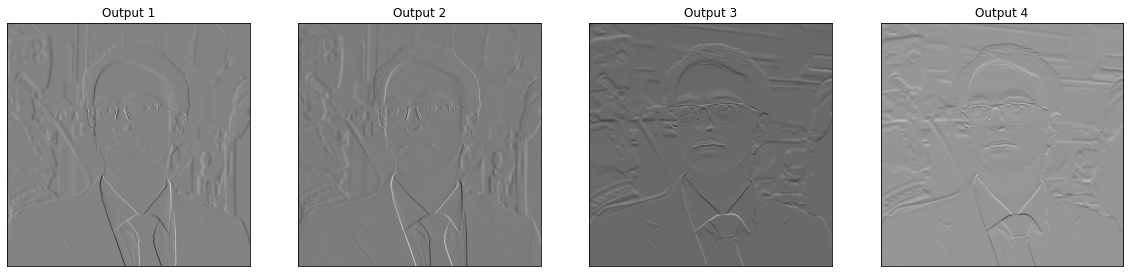

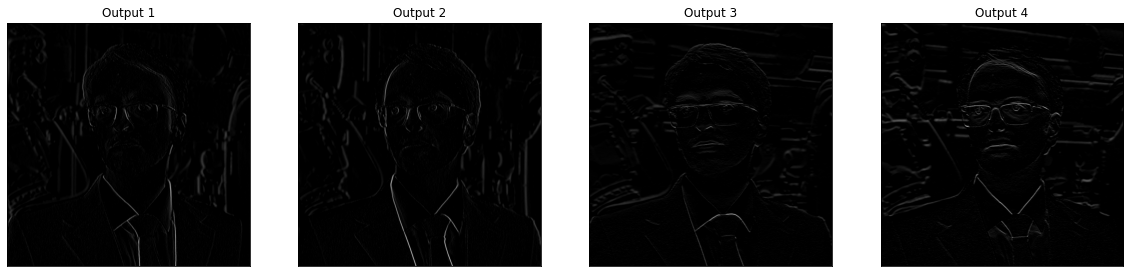

In [25]:
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

vizLayer(conv_layer)
vizLayer(activated_layer)

